
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1
---

##**GRUPO 17**

**Balbuena, Florencia**

**Conrrero, Agustina**

**Sanchez Herrera, Carlos**

**Serrantes, Sebastian**

---


In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns
import scipy as sp
from IPython.core.display import set_matplotlib_formats

sns.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,Hombre,37,Argentina,Ciudad Autónoma de Buenos Aires,13.0,6.0,6.0,0,Terciario,Completado,...,En mi trabajo actual,Heterosexual,NaN,No,501-1000,Otras industrias,7,8,Viáticos,NaN
6091,Hombre,38,Argentina,Ciudad Autónoma de Buenos Aires,12.0,5.0,5.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,2001-5000,Otras industrias,8,10,"Abono de celular, Capacitaciones y/o cursos, D...",NaN
6092,Hombre,24,Argentina,Ciudad Autónoma de Buenos Aires,2.0,2.0,2.0,0,Terciario,En curso,...,Jamás,Heterosexual,NaN,NaN,201-500,Producto basado en Software,7,9,"Capacitaciones y/o cursos, Clases de idiomas, ...",Mercado Libre
6093,Hombre,28,Argentina,La Pampa,5.0,3.0,2.0,0,Terciario,En curso,...,Jamás,Heterosexual,NaN,No,51-100,Servicios / Consultoría de Software / Digital,5,7,Capacitaciones y/o cursos,Solo Nubity


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

# Respuestas
1. Seleccionamos las siguientes columnas más relevantes:

In [ ]:
from IPython.core.display import set_matplotlib_formats
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_BRUTO', 'work_role']

**¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Consideramos que para responder esta pregunta el dataset debe ser curado dado que, para que el lenguaje de programación influya en el salario, la persona debe cumplir una función de desarrollador de ese lenguaje. Por esta razón, incluir solamente datos de personas cuyo rol se vincule con los lenguajes detallados.
Consideramos que los roles que se vinculan con el uso del lenguaje de programación son desarolladores y data scientists/engineers.
En la siguiente celda, se filtra el dataset acorde a lo mencionado en el párrafo anterior. 

Por otro lado, decidimos trabajar con el salario bruto ya que este no se ve afectado por descuentos que podrían variar de un trabajador a otro. El salario bruto se puede asociar a una funcion y no se altera dependiendo la particularidad de cada trabajador.




2. Seleccionamos las siguientes filas para analizar:

In [ ]:
#Filtrado de data segun el rol "desarrollador" y "data scientist/engineer"
df_boolean = (df['work_role'] == 'Developer') | (df['work_role'] == 'Data Scientist / Data Engineer')
df_rol_filter = df[df_boolean]
#Selección de columnas de interes
df_curada = df_rol_filter[relevant_columns]
df_curada

,tools_programming_languages,salary_monthly_BRUTO,work_role
1,"HTML, Javascript, Python",79000.0,Developer
4,"CSS, HTML, Javascript, SQL, TypeScript",140000.0,Developer
5,"Java, Javascript",54000.0,Developer
6,Javascript,75000.0,Developer
7,"Java, Javascript",45000.0,Developer
...,...,...,...
6077,".NET, C#",30000.0,Developer
6079,".NET, C#, CSS, HTML, Javascript, TypeScript",100000.0,Developer
6081,".NET, C#",20000.0,Developer
6085,"C#, CSS, HTML, Javascript, Python, SQL, TypeSc...",64800.0,Developer


Ordenando los valores de salario bruto, podemos observar que existen valores que deberían ser considerados como outliers, ya que, por ejemplo, un salario de $1 no es razonable. 

In [ ]:
#Visualización de valores mínimos y máximos de salario bruto
df_curada.sort_values('salary_monthly_BRUTO')

,tools_programming_languages,salary_monthly_BRUTO,work_role
424,"CSS, HTML, Javascript, PHP, SQL",1.000,Developer
5630,"CSS, HTML, Javascript, TypeScript",1.000,Developer
241,"HTML, Java, Javascript, PHP",21.329,Developer
3277,Ruby,32.941,Developer
4894,"CSS, HTML, Javascript, PHP",35.000,Developer
...,...,...,...
755,"R, Scala",1000000.000,Data Scientist / Data Engineer
4350,"CSS, HTML, Javascript",1040000.000,Developer
1996,Python,1200000.000,Data Scientist / Data Engineer
5844,"Objective-C, Swift",2000000.000,Developer


A continuación, decidimos eliminar todas las entradas cuyo salario no se ha completado (valores de tipo NaN) y además, filtramos los valores extremos mínimos de acuerdo al criterio de salario mínimo de 2020 según la Resolución 4/2020 del Boletín Oficial de la República Argentina (https://www.boletinoficial.gob.ar/detalleAviso/primera/236294/20201020).

In [ ]:
#Filtrado y eliminación de valores NaN y menores a $20.587,50.
df_sinNaN = df_curada.dropna()
df_sinoutliers_boolean = (df_sinNaN['salary_monthly_BRUTO'] > 20587.50)
df_sinoutliers = df_sinNaN[df_sinoutliers_boolean]
df_sinoutliers.sort_values('salary_monthly_BRUTO')


,tools_programming_languages,salary_monthly_BRUTO,work_role
3601,"Bash/Shell, C, Matlab",21100.0,Developer
2759,Ninguno de los anteriores,22000.0,Developer
1147,"Java, Python",22000.0,Developer
5681,"CSS, HTML, Python, SQL, TypeScript",22000.0,Developer
6022,"CSS, HTML, Java, Javascript, TypeScript",22000.0,Developer
...,...,...,...
755,"R, Scala",1000000.0,Data Scientist / Data Engineer
4350,"CSS, HTML, Javascript",1040000.0,Developer
1996,Python,1200000.0,Data Scientist / Data Engineer
5844,"Objective-C, Swift",2000000.0,Developer


Al visualizar los valores más altos, notamos que hay algunos que son notoriamente elevados, por lo que decidimos calcular los percentiles y en base a lo mostrado a continuación, vemos que conservando un 95% de los datos curados logramos filtrar exitosamente estos valores extremos. 

In [ ]:
#Calculo de percentiles
quantiles = df_sinoutliers["salary_monthly_BRUTO"].quantile([.95, .98, .99, .995, .999])
print(quantiles)

0.950     314100.0
0.980     500000.0
0.990     665100.0
0.995     781710.0
0.999    1128160.0
Name: salary_monthly_BRUTO, dtype: float64


In [ ]:
#Filtrado de valores menores al percentil 95
df_filtered_boolean = (df_sinoutliers['salary_monthly_BRUTO'] < df_sinoutliers["salary_monthly_BRUTO"].quantile(.95))
df_filtered = df_sinoutliers[df_filtered_boolean]
df_filtered.sort_values('salary_monthly_BRUTO')


,tools_programming_languages,salary_monthly_BRUTO,work_role
3601,"Bash/Shell, C, Matlab",21100.0,Developer
6022,"CSS, HTML, Java, Javascript, TypeScript",22000.0,Developer
2759,Ninguno de los anteriores,22000.0,Developer
5681,"CSS, HTML, Python, SQL, TypeScript",22000.0,Developer
1147,"Java, Python",22000.0,Developer
...,...,...,...
2116,"Javascript, PHP, TypeScript",307500.0,Developer
4521,"Javascript, Python, R, Ruby, SQL",310000.0,Data Scientist / Data Engineer
4216,PHP,310000.0,Developer
3636,"Javascript, Python, R",312000.0,Data Scientist / Data Engineer


En base al dataset ya curado, podemos ahora comenzar a resolver la pregunta de si el lenguaje de programación influye en el salario de los/las programadores/as.

### 3. Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [ ]:
df_filtered.tools_programming_languages[:3]

1                  HTML, Javascript, Python
4    CSS, HTML, Javascript, SQL, TypeScript
5                          Java, Javascript
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df_filtered.loc[:, 'cured_programming_languages'] = df_filtered.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df_filtered.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df_filtered[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,programming_language,tools_programming_languages,salary_monthly_BRUTO,work_role,cured_programming_languages
1,html,"HTML, Javascript, Python",79000.0,Developer,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",79000.0,Developer,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",79000.0,Developer,"[html, javascript, python]"
4,css,"CSS, HTML, Javascript, SQL, TypeScript",140000.0,Developer,"[css, html, javascript, sql, typescript]"
4,html,"CSS, HTML, Javascript, SQL, TypeScript",140000.0,Developer,"[css, html, javascript, sql, typescript]"
...,...,...,...,...,...
6090,html,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",99000.0,Developer,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,javascript,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",99000.0,Developer,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,php,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",99000.0,Developer,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,sql,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",99000.0,Developer,"[.net, c#, cobol, css, html, javascript, php, ..."


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [ ]:
#Visualización de la frecuencia de los lenguaje de programación
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:50]

,language,frequency
0,javascript,1476
1,html,1014
2,sql,1013
3,css,773
4,java,742
5,typescript,518
6,python,474
7,.net,439
8,c#,423
9,php,375


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`. La lista de `interesting_languages` fue creada considerando los x lenguajes con mayor frecuencia.

In [ ]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
#interesting_languages = ["javascript", "html", "sql", "css", "java", "typescript","python", ".net", "c#", "php", "bash/shell", "go", "kotlin"]
num_of_languages = 22
interesting_languages = language_count.language[:num_of_languages].tolist()

#Incluimos todos los lenguajes con un conteo mayor a 500.
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang

,programming_language,tools_programming_languages,salary_monthly_BRUTO,work_role,cured_programming_languages
1,html,"HTML, Javascript, Python",79000.0,Developer,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",79000.0,Developer,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",79000.0,Developer,"[html, javascript, python]"
4,css,"CSS, HTML, Javascript, SQL, TypeScript",140000.0,Developer,"[css, html, javascript, sql, typescript]"
4,html,"CSS, HTML, Javascript, SQL, TypeScript",140000.0,Developer,"[css, html, javascript, sql, typescript]"
...,...,...,...,...,...
6090,html,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",99000.0,Developer,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,javascript,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",99000.0,Developer,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,php,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",99000.0,Developer,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,sql,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",99000.0,Developer,"[.net, c#, cobol, css, html, javascript, php, ..."


A continuación graficamos la frecuencia de los lenguajes que se encuentran en la lista de interesting_languages, de mayor a menor.

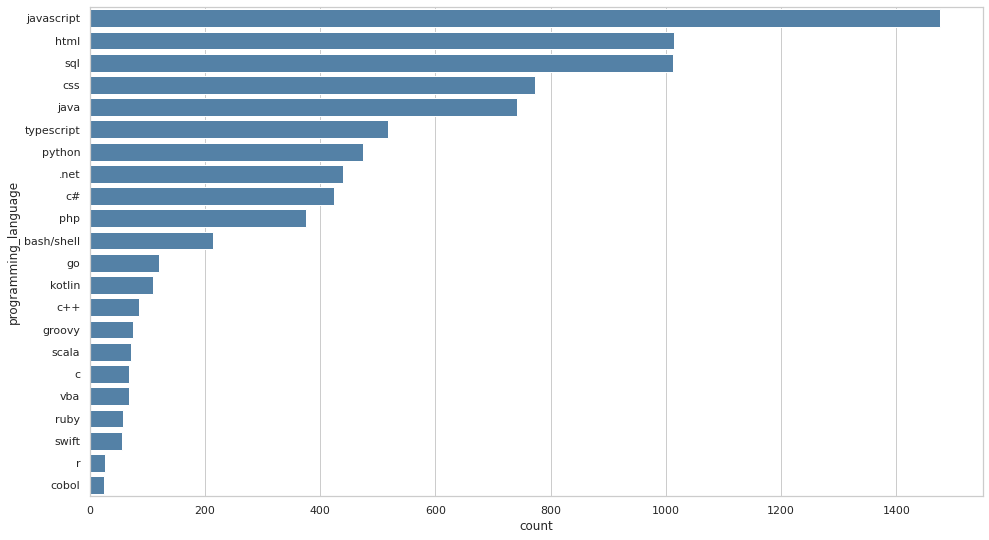

In [ ]:
#Grafico de la frecuencia de los lenguajes que se encuentran en la lista interesting_languages
fig = plt.figure(figsize=(16,9))
sns.set_theme(style="whitegrid")
sns.countplot(data=filtered_df_lang,
              y="programming_language",
              color='steelblue',
              order=filtered_df_lang.programming_language.value_counts().index) 

En la gráfica anterior se puede observar que si bien existe una gran diferencia de la frecuencia de los lenguajes, consideramos que una frecuencia igual a 25 (correspondiente al valor mínimo) es aceptable para nuestro análisis.

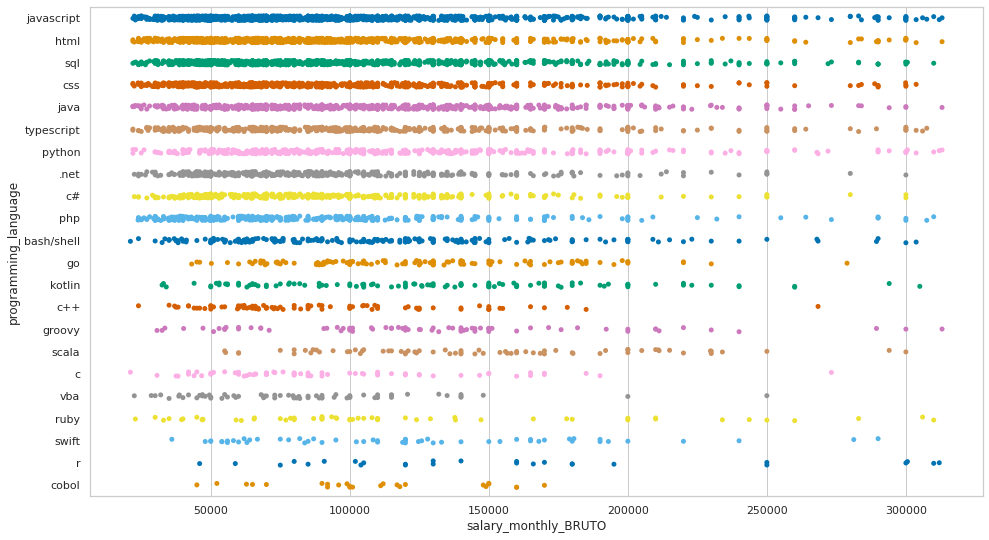

In [ ]:
#Grafica de distribución de salario bruto correspondiente a cada lenguaje seleccionado
fig = plt.figure(figsize=(16,9))
sns.stripplot(x='salary_monthly_BRUTO', y='programming_language', 
                 data=filtered_df_lang, 
                 palette="colorblind",
                 order=filtered_df_lang.programming_language.value_counts().index)



En el gráfico anterior se puede observar que existen diferencias entre las remuneraciones de los distintos lenguajes de programación. Se destaca que, para algunos lenguajes, los valores mínimos de salario bruto son considerablemente mayores que para otros.

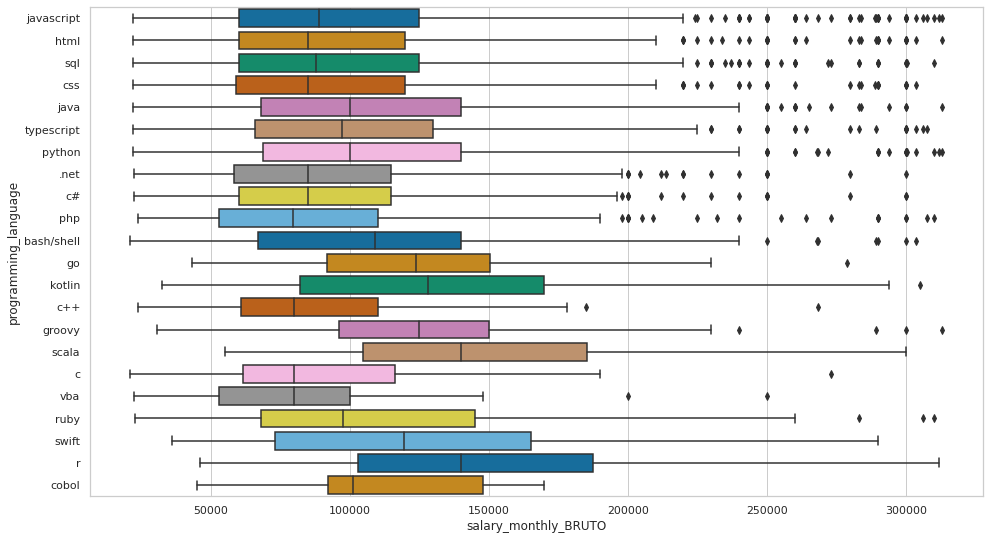

In [ ]:
#Grafico de distribución de salario bruto de los lenguajes seleccionados
fig = plt.figure(figsize=(16,9))
x_values = interesting_languages
y_values = []
z_values = []
for lang in interesting_languages:
  temp = filtered_df_lang[filtered_df_lang['programming_language'] == lang]
  y_values.append(temp.salary_monthly_BRUTO.mean())
  z_values.append(temp.salary_monthly_BRUTO.quantile(.25))
sns.boxplot(x='salary_monthly_BRUTO', y='programming_language', 
                 data=filtered_df_lang, 
                 palette="colorblind",
                 order=filtered_df_lang.programming_language.value_counts().index)

Respecto al gráfico anterior podemos concluir que, dentro de los lenguajes más utilizados (aquellos con mayor frecuencia) se presenta una distribución similar,
mientras que entre los menos frecuentes existen diferencias significativas. Además, los lenguajes ampliamente utilizados no están asociados a mayores salarios. Sin embargo, dentro de los lenguajes con menos frecuencias podemos observar que existen algunos con estadisticos (media, q25 y q75) considerablemente superiores. Esto podría estar relacionado con una mayor demanda, y consecuentemente, con un mejor pago de los mismos.

Concluimos que los lenguajes de programación asociados a los mejores salarios son:
- R
- Scala
- Kotlin
- Groovy
- Go



# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta (varias variables)

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




Para el ejercicio elegimos las siguientes variables
### Categoricas
- profile_gender
- profile_studies_level
- profile_studies_level_state

Nota: las variables profile_studies_level y profile_studies_level_state fueron combinadas en una unica variable categorica lo cual se describe en los posteriores ejercicios. De esta manera, las variables categoricas utilizadas para analizar resultan ser 2.

### Numéricas
- profile_age
- salary_monthly_BRUTO
- salary_monthly_NETO

In [ ]:
#Selección de columnas de interes
relevant_columns_part2 = ['profile_gender', 'profile_age', 'profile_years_experience', 'profile_studies_level', 'profile_studies_level_state', 'salary_monthly_BRUTO', 'salary_monthly_NETO']
df_curada_part2 = df[relevant_columns_part2]
df_curada_part2

,profile_gender,profile_age,profile_years_experience,profile_studies_level,profile_studies_level_state,salary_monthly_BRUTO,salary_monthly_NETO
0,Mujer,26,3.0,Universitario,En curso,53000.0,43000.000
1,Hombre,29,5.0,Universitario,En curso,79000.0,63000.000
2,Mujer,22,2.0,Secundario,Completado,160000.0,127000.000
3,Hombre,39,15.0,Posgrado,Incompleto,130000.0,102000.000
4,Hombre,32,9.0,Universitario,En curso,140000.0,106000.000
...,...,...,...,...,...,...,...
6090,Hombre,37,13.0,Terciario,Completado,99000.0,97000.000
6091,Hombre,38,12.0,Universitario,En curso,85000.0,71000.000
6092,Hombre,24,2.0,Terciario,En curso,47250.0,45.753
6093,Hombre,28,5.0,Terciario,En curso,86000.0,72.000


In [ ]:
#Descripcion de los datos
df_curada_part2['salary_monthly_BRUTO'].describe().apply(lambda s: '{0:.2f}'.format(s))

count       6095.00
mean      124058.55
std       122912.35
min            1.00
25%        61595.00
50%        96000.00
75%       145000.00
max      2180000.00
Name: salary_monthly_BRUTO, dtype: object

In [ ]:
#Filtrado y eliminación de valores NaN y menores a 20587.50
df_sinNaN = df_curada_part2.dropna()
df_sinoutliers_boolean = (df_sinNaN['salary_monthly_BRUTO'] > 20587.50)
df_sinoutliers = df_sinNaN[df_sinoutliers_boolean]
df_sinoutliers.sort_values('salary_monthly_BRUTO')

,profile_gender,profile_age,profile_years_experience,profile_studies_level,profile_studies_level_state,salary_monthly_BRUTO,salary_monthly_NETO
4869,Hombre,28,7.0,Secundario,Completado,21000.0,17000.0
4880,Hombre,29,5.0,Universitario,Completado,21300.0,17900.0
4943,Hombre,30,7.0,Secundario,En curso,21500.0,18500.0
5171,Hombre,24,0.0,Universitario,En curso,21600.0,21600.0
275,Hombre,25,3.0,Universitario,En curso,21800.0,19800.0
...,...,...,...,...,...,...,...
3358,Hombre,31,10.0,Universitario,Incompleto,1439100.0,1066000.0
2895,Hombre,32,18.0,Posdoctorado,En curso,1680000.0,1500000.0
5844,Hombre,28,8.0,Universitario,En curso,2000000.0,150000.0
4486,Hombre,40,20.0,Universitario,Incompleto,2080000.0,2080000.0


In [ ]:
#Filtrado de valores menores al percentil 95
df_filtered_boolean = (df_sinoutliers['salary_monthly_BRUTO'] < df_sinoutliers["salary_monthly_BRUTO"].quantile(.95))
df_filtered = df_sinoutliers[df_filtered_boolean]
df_filtered.sort_values('salary_monthly_BRUTO')

,profile_gender,profile_age,profile_years_experience,profile_studies_level,profile_studies_level_state,salary_monthly_BRUTO,salary_monthly_NETO
4869,Hombre,28,7.0,Secundario,Completado,21000.0,17000.0
4880,Hombre,29,5.0,Universitario,Completado,21300.0,17900.0
4943,Hombre,30,7.0,Secundario,En curso,21500.0,18500.0
5171,Hombre,24,0.0,Universitario,En curso,21600.0,21600.0
275,Hombre,25,3.0,Universitario,En curso,21800.0,19800.0
...,...,...,...,...,...,...,...
2406,Hombre,40,22.0,Universitario,Completado,292000.0,216000.0
4665,Hombre,41,21.0,Terciario,Incompleto,293995.0,192072.0
2175,Hombre,32,11.0,Universitario,En curso,295000.0,200000.0
3832,Hombre,35,17.0,Universitario,Incompleto,297000.0,297000.0


In [ ]:
#Visualización de la frecuencia del genero
gender_count = df_filtered.profile_gender.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'gender', 'profile_gender': 'frequency'})
gender_count[:50]

,gender,frequency
0,Hombre,4486
1,Mujer,829
2,Otros,26


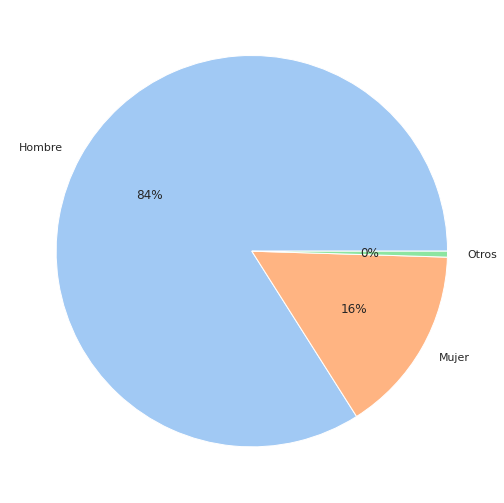

In [ ]:
#Visualizacion de la frecuencia de género
fig = plt.figure(figsize=(16,9))
labels = gender_count.gender
colors = sns.color_palette('pastel')[0:5]
plt.pie(gender_count.frequency, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Para el siguiente análisis definimos 3 categorías para agrupar los niveles de estudio considerando el estado de los mismos (completado/incompleto/en curso). 
Para ello definimos:  
*   *Nivel medio:* primario, secundario, terciario, universitario en curso e incompleto
*   *Nivel de grado:* universitario completado, posgrado en curso e incompleto, doctorado en curso e incompleto
*   *Nivel posgrado:* posgrado completado, doctorado completado, posdoctorado completado

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


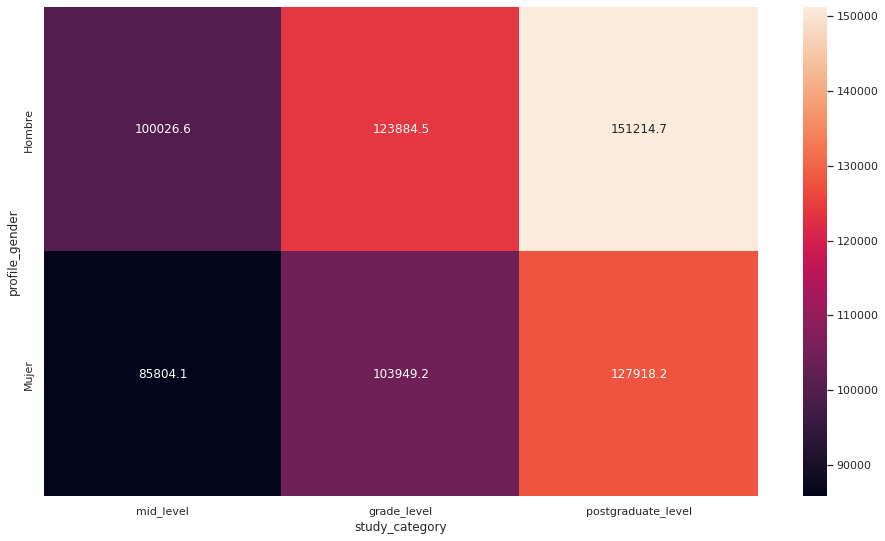

In [ ]:
#Definición de categorias
def categorise(row):
  if (row['profile_studies_level'] == 'Primario') | (row['profile_studies_level'] == 'Secundario') | (row['profile_studies_level'] == 'Terciario') | (row['profile_studies_level'] == 'Universitario') & (row['profile_studies_level_state'] == 'Incompleto') | (row['profile_studies_level'] == 'Universitario') & (row['profile_studies_level_state'] == 'En curso'):
    return 'mid_level'
  elif (row['profile_studies_level'] == 'Universitario') & (row['profile_studies_level_state'] == 'Completado') | (row['profile_studies_level'] == 'Posgrado') & (row['profile_studies_level_state'] != 'Completado') | (row['profile_studies_level'] == 'Doctorado') & (row['profile_studies_level_state'] != 'Completado') | (row['profile_studies_level'] == 'Posdoctorado') & (row['profile_studies_level_state'] != 'Completado'):
    return 'grade_level'
  elif (row['profile_studies_level'] == 'Posgrado') & (row['profile_studies_level_state'] == 'Completado') | (row['profile_studies_level'] == 'Doctorado') & (row['profile_studies_level_state'] == 'Completado')|(row['profile_studies_level'] == 'Posdoctorado') & (row['profile_studies_level_state'] == 'Completado') :
    return 'postgraduate_level'
df_filtered['study_category'] = df_filtered.apply(lambda row: categorise(row), axis=1)

#Filtrado del genero Otros
df_boolean = df_filtered['profile_gender'] != 'Otros'
df_gender_filtered = df_filtered[df_boolean]

#Visualización de la media del salario bruto de acuerdo al género y a la categoría de estudios
fig = plt.figure(figsize=(16,9))
dta_pivoteada = df_gender_filtered.pivot_table('salary_monthly_BRUTO', 'profile_gender', 'study_category', aggfunc='mean')
dta_pivoteada = dta_pivoteada[['mid_level', 'grade_level', 'postgraduate_level']]
ax = sns.heatmap(data=dta_pivoteada, annot=True, fmt='.1f')
plt.show()

Los parámetros estadísticos y las herramientas visuales constituyen elementos clave a la hora de analizar la distribución y comportamiento de un set de datos. En nuestro caso, el gráfico de mapa de calor nos permitió asociar la media de los ingresos (salario bruto) con la categoría de estudio y el género. 
El género "Otros" no fue considerado en el análisis debido a la baja frecuencia de los datos. 
En conclusión, los datos sugieren que la categoría de estudio influye en el salario, notándose un incremento en el mismo conforme aumenta el nivel de estudios alcanzados, tanto para hombres como mujeres. Por otro lado, observamos que la media de los salarios de los hombres es superior al de las mujeres independientemente del estudio alcanzado.  

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? ¿Que abordaje y medidas usaría?



<Figure size 1152x648 with 0 Axes>

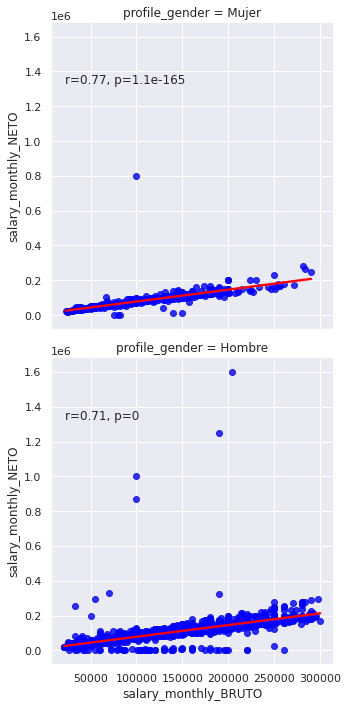

In [ ]:
fig = plt.figure(figsize=(16,9), constrained_layout = True)
#sns.regplot(data=df_filtered, x="salary_monthly_BRUTO", y="salary_monthly_NETO", scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.set_theme(color_codes=True)
g = sns.lmplot(data=df_gender_filtered, x="salary_monthly_BRUTO", y="salary_monthly_NETO", row='profile_gender', scatter_kws={"color": "blue"}, line_kws={"color": "red"})

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['salary_monthly_BRUTO'], data['salary_monthly_NETO'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
plt.show()

Para evaluar la correlación entre el salario bruto y neto (dos variables numéricas) decidimos realizar un scatterplot. Nuevamente se realiza el análisis sin tener en cuenta el género "otros" por las razones explicadas en el ejercicio anterior. Para los 2 casos (mujeres y hombres) los valores se muestran alineados por lo que la covarianza debería ser mayor a 0, mostrando una correlación entre ambas variables. Por lo tanto, acorde a estos resultados, la columna de salario bruto podría ser removida de la encuesta. 

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [ ]:
df_filtered

,profile_gender,profile_age,profile_years_experience,profile_studies_level,profile_studies_level_state,salary_monthly_BRUTO,salary_monthly_NETO,study_category
0,Mujer,26,3.0,Universitario,En curso,53000.0,43000.000,mid_level
1,Hombre,29,5.0,Universitario,En curso,79000.0,63000.000,mid_level
2,Mujer,22,2.0,Secundario,Completado,160000.0,127000.000,mid_level
3,Hombre,39,15.0,Posgrado,Incompleto,130000.0,102000.000,grade_level
4,Hombre,32,9.0,Universitario,En curso,140000.0,106000.000,mid_level
...,...,...,...,...,...,...,...,...
6090,Hombre,37,13.0,Terciario,Completado,99000.0,97000.000,mid_level
6091,Hombre,38,12.0,Universitario,En curso,85000.0,71000.000,mid_level
6092,Hombre,24,2.0,Terciario,En curso,47250.0,45.753,mid_level
6093,Hombre,28,5.0,Terciario,En curso,86000.0,72.000,mid_level


En este ejercicio analizamos la distribución de los salarios según los niveles de estudio "medio" (primario, secundario, terciario, universitario en curso e incompleto) y "de grado" (universitario completado, posgrado en curso e incompleto, doctorado en curso e incompleto) según la categorización realizada en el ejercicio 2.a.

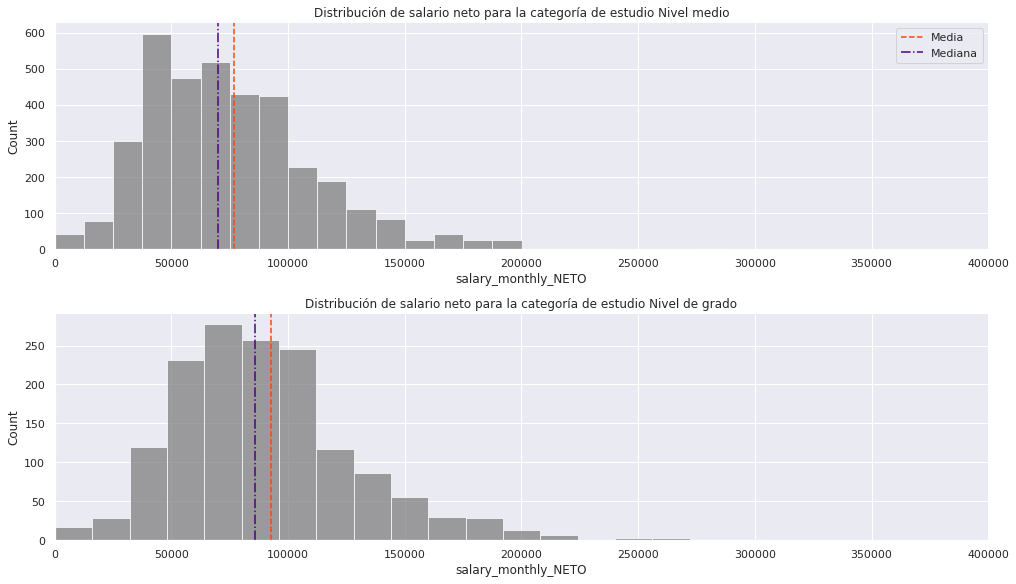

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(14, 8), constrained_layout = True)

filtered_midlevel = df_filtered[df_filtered['study_category'] == 'mid_level'] 
sns.histplot(filtered_midlevel['salary_monthly_NETO'], bins=100, ax=axes[0], color='gray') #Histograma con 100 bins
axes[0].axvline(filtered_midlevel['salary_monthly_NETO'].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(filtered_midlevel['salary_monthly_NETO'].median(), color='indigo',
            linestyle='-.', label='Mediana')

axes[0].set_xlim(0,400000)
axes[0].set_title('Distribución de salario neto para la categoría de estudio Nivel medio')

filtered_gradelevel= df_filtered[df_filtered['study_category'] == 'grade_level'] 
sns.histplot(filtered_gradelevel['salary_monthly_NETO'], bins=100, ax=axes[1], color='gray') #Histograma con 100 bins
axes[1].axvline(filtered_gradelevel['salary_monthly_NETO'].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(filtered_gradelevel['salary_monthly_NETO'].median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[1].set_xlim(0,400000)
axes[1].set_title('Distribución de salario neto para la categoría de estudio Nivel de grado')

axes[0].legend()
sns.despine()


In [ ]:
filtered_midlevel['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s))

count       3630.00
mean       77017.83
std        47003.95
min           13.00
25%        48140.25
50%        70000.00
75%        96000.00
max      1250000.00
Name: salary_monthly_NETO, dtype: object

In [ ]:
filtered_gradelevel['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s))

count       1525.00
mean       92578.06
std        59281.20
min           62.25
25%        63000.00
50%        86000.00
75%       110000.00
max      1600000.00
Name: salary_monthly_NETO, dtype: object

Las medidas de centralización (media y mediana) de la subpoblación grade_level son mayores que las de mid_level. En el caso de la desviación estándar sucede lo mismo, aunque si se comparan ambos histogramas se puede observar que la dispersión de ambas subpoblaciones no es significativamente diferente.

En conclusión, la información brindada a través de los histogramas y de las medidas de centralización (media y mediana) y dispersión (desviación estándar) de ambas subpoblaciones sugiere que existe una dependencia entre el salario neto y los niveles de estudios analizados.

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


Para el análisis, en primer lugar se filtraron los datos cuyo salario neto era superior a 20587.5 debido a lo expuesto en el inciso 1.

En segundo lugar, se filtraron las filas cuyo salario neto era mayor al salario bruto dado que este último contempla no solo el monto neto, sino también bonos, prestaciones, horas extra, etc.

Por último, se elegió la variable "años de experiencia" para evaluar la correlación de la misma con la variable "salario Neto".

Según lo visualizado en el seguiente scatter plot, pareciera que las variables no estan relacionadas entre si ya que la nube de puntos esta muy dispersa indicando un bajo grado de correlación entre ambas variables.

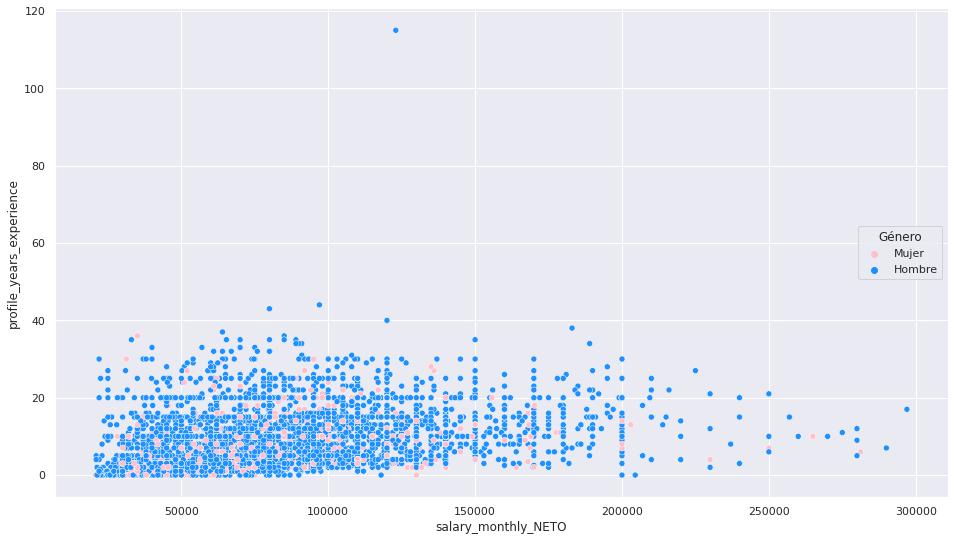

In [ ]:
#Filtrado de valores
df_gender_filtered = df_gender_filtered[df_gender_filtered['salary_monthly_NETO'] >= 20587.50]
df_filtered_cured = (df_gender_filtered[df_gender_filtered.salary_monthly_BRUTO >= df_gender_filtered.salary_monthly_NETO])

#Grafica de dispersión entre salario neto y años de experiencia discriminando por la variable género
fig = plt.figure(figsize=(16,9))
sns.scatterplot(x='salary_monthly_NETO',
                y='profile_years_experience',
                data=df_filtered_cured,
                hue='profile_gender',
                palette=['pink','dodgerblue'])
plt.legend(title='Género', loc='right')